In [21]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
import os
from hydra import compose, initialize

In [11]:
# global initialization
initialize(version_base=None, config_path="../configs")
cfg = compose(config_name="config")

In [12]:
label_map = cfg.label_map
convert_label_map = {y: x for x, y in label_map.items()}
num_classes = cfg.constants.num_classes

In [33]:
f = open("../data/processed/X_test_pitch.pkl", "rb")
X_test = pickle.load(f)
f.close()
print("X_test loaded!")

f = open("../data/processed/y_test.pkl", "rb")
y_test = pickle.load(f)
f.close()
print("y_test loaded!")

a = y_test
y_test = np.zeros((len(a), 11))
for i in range(len(a)):
    y_test[i] = a[i][0]

X_test loaded!
y_test loaded!


In [32]:
instrument_distribution_train = [len(os.listdir("../data/raw/IRMAS_Training_Data/" + convert_label_map[i])) for i in range(11)]

data = [[convert_label_map[i], instrument_distribution_train[i]] for i in range(num_classes)]
df = pd.DataFrame(data=data, columns = ["instrument", "count"])

dfi.export(df, '../pictures/instrument_distribution_train.png')
print(df)

   instrument  count
0         cel    388
1         cla    505
2         flu    451
3         gac    637
4         gel    760
5         org    682
6         pia    721
7         sax    626
8         tru    577
9         vio    580
10        voi    778


In [31]:
instrument_distribution_test = [int(np.sum(y_test[:, i])) for i in range(0, 11)]

data = [[convert_label_map[i], instrument_distribution_test[i]] for i in range(num_classes)]
df = pd.DataFrame(data=data, columns = ["instrument", "count"])

dfi.export(df, '../pictures/instrument_distribution_test.png')
print(df)

   instrument  count
0         cel    111
1         cla     62
2         flu    163
3         gac    535
4         gel    942
5         org    361
6         pia    995
7         sax    326
8         tru    167
9         vio    211
10        voi   1044


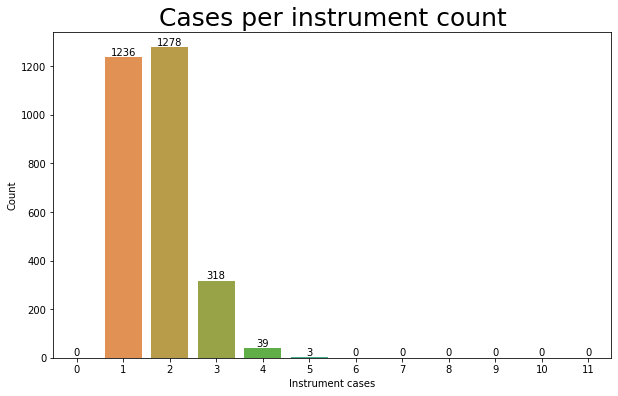

In [61]:
cases_per_num_instrument = np.zeros(12)
for row in y_test:
    cases_per_num_instrument[int(np.sum(row))] += 1

plt.figure(figsize=(10,6))
barplot = sns.barplot(x=[i for i in range(12)],y=cases_per_num_instrument)
for container in barplot.containers:
    barplot.bar_label(container)
barplot.set(xlabel='Instrument cases', ylabel='Count')
barplot.set_title("Cases per instrument count", fontdict={'size': 25})
plt.savefig('../pictures/cases_per_instrument_count_barplot.png')

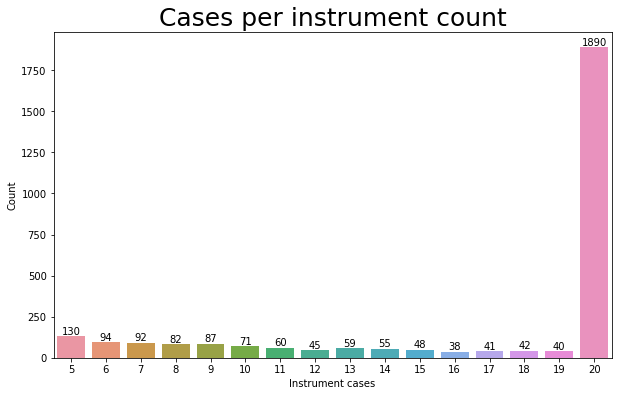

In [62]:
audio_len = [[i, X_test[i].size(0)] for i in range(len(X_test))]

df = pd.DataFrame(data=audio_len, columns=["id", "length"])

df = df.groupby("length").count().reset_index()

df = pd.DataFrame({'length': df["length"], 'count': df["id"]})

plt.figure(figsize=(10,6))
barplot = sns.barplot(x="length", y="count", data=df)
for container in barplot.containers:
    barplot.bar_label(container)
barplot.set(xlabel='Instrument cases', ylabel='Count')
barplot.set_title("Cases per instrument count", fontdict={'size': 25})
plt.savefig('../pictures/length_distribution_barplot.png')